<a href="https://colab.research.google.com/github/rujeenaal-zyoud/-breast-cancer-detection-using-ML/blob/main/Breast_cancer_detect_using_ml_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [16]:
df.shape


(569, 33)

In [17]:
df.isna

<bound method DataFrame.isna of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>

In [18]:
#drop all column with missing value we will drop the last col 
df=df.dropna(axis=1)


In [19]:
#get the new number of rows and col with no missing value 
df.shape

(569, 32)

In [20]:
#get the number of (M) malignant  cells and (B) bengin  cells 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


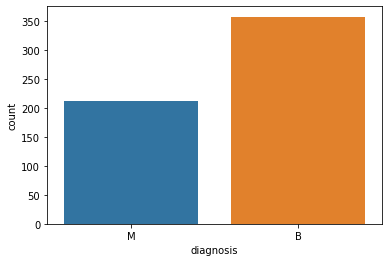

In [21]:
#visualization the count 
sns.countplot(df['diagnosis'],label=['count'])

In [22]:
#look the datatype colume to look wich data need to encoded 
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [23]:
#encode the catogrical data  data preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
df.iloc[:,1]=labelencoder_y.fit_transform (df.iloc[:,1].values)
#the diagnosis will encode to 0 & 1 insted of M & B 
#The row below sho that real value of diagnosis 
##df.iloc[:,1].values
#To see the 0 and 1 of vaule with index the row below show that 
##df.iloc[:,1]





/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


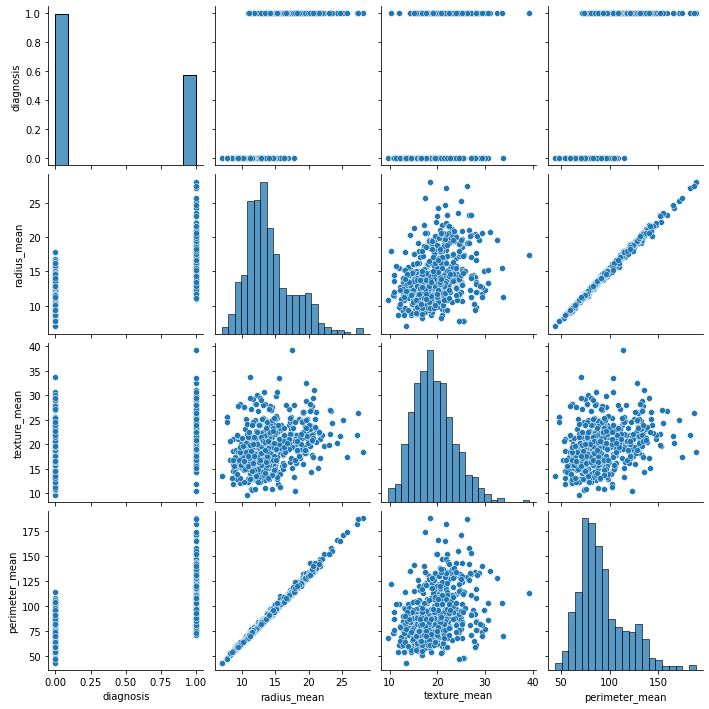

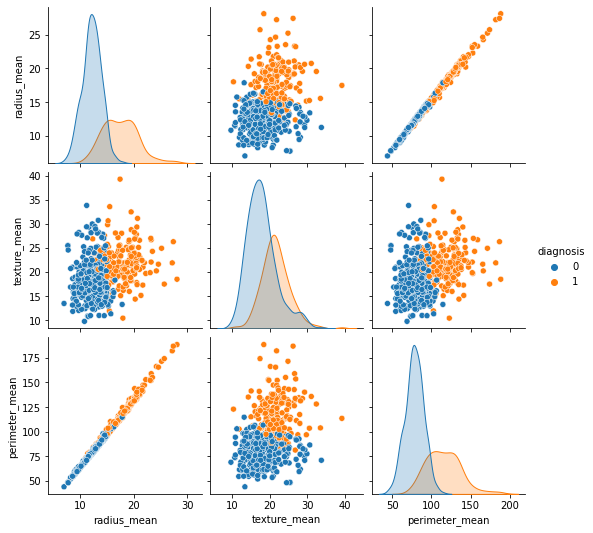

In [24]:
#create the pair plot
sns.pairplot (df.iloc[:,1:5])
#create the pair plot with diagnosis to determine m or b cases like  point the 1 cancer cells and 0 the belign cells
sns.pairplot (df.iloc[:,1:5],hue='diagnosis')

In [25]:
#print the new data after preprocessing the encoding diagnosis colum
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
#get the corrletion of data colum to can easily classifiction 
df.iloc [:,1:12].corr()
#get the  of data colum  without corrletion 
##df.iloc [:,1:12]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


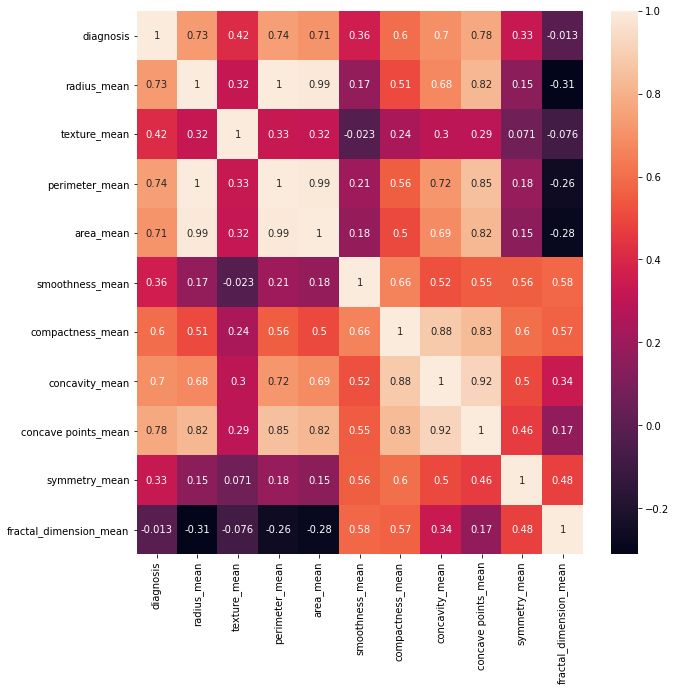

In [27]:
#visultion the corrletion data  
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True)


In [28]:
#split the data into independet data X and dependent data Y dataset
X=df.iloc[:,1:31].values
Y=df.iloc[:,1].values

In [29]:
#Split the data into 75% traning data and 25%test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

In [30]:
#scale feutre  fitting the data for test and train data for indepedned data (X)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_test=sc.fit_transform(X_test)
X_train=sc.fit_transform(X_train)
X_train



array([[-0.75429803, -1.15036482, -0.39064196, ..., -0.81232053,
        -0.75798367, -0.01614761],
       [-0.75429803, -0.93798972,  0.68051405, ..., -0.37504806,
        -0.60687023,  0.09669004],
       [-0.75429803,  0.574121  , -1.03333557, ..., -0.18298917,
        -0.02371948, -0.20050207],
       ...,
       [-0.75429803, -1.32422924, -0.20048168, ..., -0.76769066,
        -0.97974953, -0.71542314],
       [-0.75429803, -1.24380987, -0.2245526 , ..., -1.34136004,
        -1.75401433, -1.58157125],
       [-0.75429803, -0.73694129,  1.14989702, ...,  0.47893704,
        -0.27460457, -1.25895095]])

In [70]:
#create  multiple functions for model 
def models (X_train,Y_train):
  #logistic model 
  from sklearn.linear_model import LogisticRegression
  import sklearn.linear_model as sk

  log=sk.LogisticRegressionCV()
  log.fit(X_train,Y_train)
   # predict the output
  y_pred = models.predict(y_test)

  #decsion tree

  #from sklearn.tree import DecisionTreeRegressor
  #tree=DecisionTreeClassifier(criteron='entropy',random_state=0)
  #tree.fit(X_train,Y_train)
#print the accuray of each model then choice the model with high accurcay
  print('[0]logisticRegressin training accuray:',log.score(X_train,Y_train))
  print(y_pred)
  #print('[0]logisticRegressin training accuray:',tree.score(X_train,Y_train))
  return log,y_pred


In [71]:
#getting all of the models 
model= models(X_train, Y_train)


AttributeError: ignored

In [40]:
#using xgb model to classifier
#from xgboost import XGBClassifier
#xgb_classifier = XGBClassifier()
#xgb_classifier.fit(X_train,Y_train)
#print('[0]logisticRegressin training accuray:' ,xgb_classifier.score(X_train,Y_train))

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_train)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

ValueError: ignored

In [54]:
## Pickle
import pickle
# save model
pickle.dump(models, open('breast_cancer_detector.pickle', 'wb'))
 
# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))
 



# show the accuracy
print('Accuracy of XGBoost model = ',log.score(y_test, y_pred))

AttributeError: ignored